In [2]:
import cv2
import numpy as np
import os
import lbp
from matplotlib import pyplot as plt
import pandas as pd


# Local Binary Patern

In [3]:
img=cv2.imread('test.jpg')

In [4]:
height,width,channel=img.shape

In [5]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [6]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

NameError: name 'img_bgr' is not defined

In [9]:
img_lbp = np.zeros((height, width,3), np.uint8)

In [10]:
def LBP_Value(img, centerPixel, x, y):
    LbpVal = 0
    try:
        if img[x][y] >= centerPixel:
            LbpVal = 1
    except:
        pass
    return LbpVal


In [11]:
def lbp_calculated_pixel(img, x, y):
   
    centerPixel = img[x][y]
   
    LBP_array = []
      
    # top_left
    LBP_array.append(LBP_Value(img, centerPixel, x-1, y-1))
      
    # top
    LBP_array.append(LBP_Value(img, centerPixel, x-1, y))
      
    # top_right
    LBP_array.append(LBP_Value(img, centerPixel, x-1, y + 1))
      
    # right
    LBP_array.append(LBP_Value(img, centerPixel, x, y + 1))
      
    # bottom_right
    LBP_array.append(LBP_Value(img, centerPixel, x + 1, y + 1))
      
    # bottom
    LBP_array.append(LBP_Value(img, centerPixel, x + 1, y))
      
    # bottom_left
    LBP_array.append(LBP_Value(img, centerPixel, x + 1, y-1))
      
    # left
    LBP_array.append(LBP_Value(img, centerPixel, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(LBP_array)):
        val += LBP_array[i] * power_val[i]
          
    return val
   


In [31]:
def show_output(output_list):
    
    output_list_len = len(output_list)
    
    figure = plt.figure()
    
    for i in range(output_list_len):
        
        current_dict = output_list[i]
        
        current_img = current_dict["img"]
        
        current_xlabel = current_dict["xlabel"]
        
        current_ylabel = current_dict["ylabel"]
        
        current_xtick = current_dict["xtick"]
        
        current_ytick = current_dict["ytick"]
        
        current_title = current_dict["title"]
        
        current_type = current_dict["type"]
        
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        
        if current_type == "gray":
            
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            
            current_plot.set_title(current_title)
            
            current_plot.set_xticks(current_xtick)
            
            current_plot.set_yticks(current_ytick)
            
            current_plot.set_xlabel(current_xlabel)
            
            current_plot.set_ylabel(current_ylabel)
            
        elif current_type == "histogram":
            
            current_plot.plot(current_img, color = "black")
            
            current_plot.set_xlim([0,260])
            
            current_plot.set_title(current_title)
            
            current_plot.set_xlabel(current_xlabel)
            
            current_plot.set_ylabel(current_ylabel)  
            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()

<ipython-input-12-364be69feeab>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


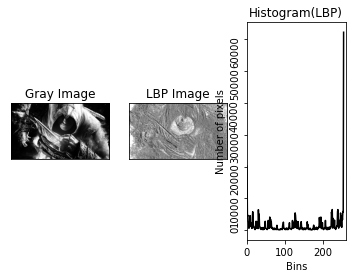

LBP Program is finished


In [13]:
for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LBP Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()


print("LBP Program is finished")

In [15]:
cv2.imshow("AI",img)
cv2.waitKey(0)

27

Local ternary pattern

In [17]:
def LocalTernaryPattern(img, t):
    numrows = len(img) - 2  # number of rows
    numcols = len(img[0]) - 2  # number of columns
    x = np.zeros((numrows, numcols))  # [[0 for i in range(numrows-1)] for j in range(numcols)]
    bi = []
    for i in range(1, numrows - 1):
        for j in range(1, numcols - 1):
            if img[i - 1][j - 1] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i][j - 1] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i + 1][j - 1] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i + 1][j] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i + 1][j + 1] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i][j + 1] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i - 1][j + 1] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)
            if img[i - 1][j] > img[i][j]:
                bi.append(1)
            else:
                bi.append(0)

            dec = int(''.join(str(x) for x in bi), base=2)
            bi = [0]
            x[i - 1][j - 1] = dec

    # x=x*((1/x.max())*9)#normalization

    numrows = len(img) - 2
    numcols = len(img[0]) - 2
    y = np.zeros((numrows, numcols))
    bi = []
    d = t
    for i in range(1, numrows - 1):
        for j in range(1, numcols - 1):
            if (img[i - 1][j - 1] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i][j - 1] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i + 1][j - 1] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i + 1][j] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i + 1][j + 1] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i][j + 1] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i - 1][j + 1] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)
            if (img[i - 1][j] - img[i][j]) >= d:
                bi.append(1)
            else:
                bi.append(0)

            dec = int(''.join(str(x) for x in bi), base=2)
            bi = [0]
            y[i - 1][j - 1] = dec
    # y=y*((1/y.max())*9)
    z = x + y
    z = z * ((1 / y.max()) * 9)
    return z


In [18]:
ltp=LocalTernaryPattern(img, 10)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [19]:
#function to shift the number to right
def rightshift(num, shift):
    #right shift the number to right
    #left shift numbers and mask the MSB for 8 bit number if rigt-shift condition(1st condition) is false
    return (num >> shift) | ((num << (8 - shift)&0xFF))


# In[ ]:


#to count number of set bits 
def countSetBits(code):
    count=0
    while(code!=0):
        if(code & 0x01):
            count=count + 1
        code=code>>1
    return count


# In[ ]:


#to check the given binary code is uniform (containing at max 2 0 to 1/1 to 0 transitions) or not
#rigtshift the given code by 1 and xor it with original code, then count number of set bits from xored code, if count<=2 then uniform
def checkUniform(code):
    b = rightshift(code,1)
    c = code ^ b
    count=countSetBits(c)
    if (count <=2):
        return True
    else:
        return False


# In[ ]:


#3x3 neighborhood will have 8 neighborhood pixels
#all non uniform codes are assigned to 58, there are total 58 uniform codes (0 to 57) and remaining are non-uniform
def initUniform():
    lookup=[item for item in range(0,256)]
    index=0
    for i in range(0,256):
        status=checkUniform(i)
        if(status==True):
            lookup[i]=index
            index=index+1
        else:
            lookup[i]=58
    return lookup


# In[ ]:


lookup=[]
lookup=initUniform()
print(lookup)


# In[ ]:


l1=[item for item in range(0,256)]
l2=[0 for item in range(0,256)]
dict_flag=dict(zip(l1,l2))
print(dict_flag)
l3=[item for item in range(0,256)]
lookup_dict=dict(zip(l3,lookup))
print(lookup_dict)


# In[ ]:


lookup_dict[0]=0
dict_flag[0]=1
lookup_dict[255]=8
dict_flag[255]=1
for i in range(0,256):
    if(lookup_dict[i]==58):
        lookup_dict[i]=9
        dict_flag[i]=1

print(lookup_dict)
print(dict_flag)


# In[ ]:


temp=[0,0,0,0,0,0,0,0,0]
lbp_code=1
for i in range(1,255):
    
    if(lookup_dict[i]!=9 and dict_flag[i]==0):
        temp[0]=i
        for j in range(1,9):
            temp[j]=rightshift(temp[j-1],1)
        print(temp)
        #lbp_code=min(temp)
        #print(lbp_code)
        for ii in range(0,8):
            lookup_dict[temp[ii]]=lbp_code
            dict_flag[temp[ii]]=1
        print(lbp_code)
        lbp_code=lbp_code+1


# In[ ]:


def get_pixel(img, center, x, y,threshold):
    new_value = 0
    try:
        #global or local intensity as follows:
        if img[x][y] >= threshold:
            new_value = 1
        # for intensity difference as follows
        #if abs(center-img[x][y]) >= threshold:
        #    new_value = 1
        if (img[x][y]-center)>=threshold:
            new_value=1
        elif (img[x][y]-center)< -threshold:
            new_value = -1
        elif (-threshold) < (img[x][y]-center) < threshold:
            new_value=0
        
    except:
        pass
    
    
    return new_value


# In[ ]:


def get_pixel_val(img, center, x, y):
    new_value = 0
    try:
        new_value=img[x][y]
    except:
        pass
    return new_value


# In[ ]:


def lbp_calculated_pixel(img, x, y,threshold):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    lval=[]
    addition=0
    cnt_nonzero=0
    center = img[x][y]
    val=[]
    val.append(get_pixel_val(img, center, x-1, y+1))     # top_right
    val.append(get_pixel_val(img, center, x, y+1))       # right
    val.append(get_pixel_val(img, center, x+1, y+1))     # bottom_right
    val.append(get_pixel_val(img, center, x+1, y))       # bottom
    val.append(get_pixel_val(img, center, x+1, y-1))     # bottom_left
    val.append(get_pixel_val(img, center, x, y-1))       # left
    val.append(get_pixel_val(img, center, x-1, y-1))     # top_left
    val.append(get_pixel_val(img, center, x-1, y))       # top
    #local average intensity
    #threshold=sum(val)/len(val)
    '''
    for ii in range(len(val)):
        if val[ii] > 0:
            addition=addition+val[ii]
            cnt_nonzero=cnt_nonzero+1
    if cnt >0 :
        threshold=addition/cnt
    else:
        threshold=sum(val)/len(val)
    '''
    #intensity difference =5
    #threshold=5
    
    #normal LBP
    #threshold=center
    
    #for global average threshold will be as it is
    
    #for normal LBP (default)
    #threshold=center
    
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1,threshold))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1,threshold))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1,threshold))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y,threshold))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1,threshold))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1,threshold))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1,threshold))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y,threshold))       # top
    
    val_upperLTP=[]
    val_lowerLTP=[]
    for i in range(0,len(val_ar)):
        if(val_ar[i]==-1):
            val_upperLTP.append(0)
        else:
            val_upperLTP.append(val_ar[i])
    
    for i in range(0,len(val_ar)):
        if (val_ar[i]==-1):
            val_lowerLTP.append(1)
        elif (val_ar[i]==1):
            val_lowerLTP.append(0)
        else:
            val_lowerLTP.append(val_ar[i])
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    #val = 0
    val_upper=0
    val_lower=0
    #for i in range(len(val_ar)):
    #    val += val_ar[i] * power_val[i]
    
    for i in range(0,len(val_upperLTP)):
        val_upper += val_upperLTP[i] * power_val[i]
        
    for i in range(0,len(val_lowerLTP)):
        val_lower += val_lowerLTP[i] * power_val[i]
        
    
    #return val 
    return (lookup_dict[val_upper], lookup_dict[val_lower])


# In[ ]:


#lbp_vector=np.zeros((4,10),dtype=np.int64)
lbp_vector=[]
lbp_class1=[]
lbp_class2=[]
stat_vector1=[]
stat_vector2=[]

print(no_images)
for images in range(0,no_images):
#for images in range(0,2):
    print(images)
    hist=[]
   
    cnt1=0
    min_i=10000000
    min_j=10000000
    max_i=0
    max_j=0
    for i in range(0+(240*images),240+(240*images)):
        mm=0
        for j in range(0,240):
            if(im_graymask[i][j]>0):
                if(i<min_i):
                    min_i=i
                if(j<min_j):
                    min_j=j
                if(i>max_i):
                    max_i=i
                if(j>max_j):
                    max_j=j
            #print(im_graymask[i][j])
                cnt1=cnt1+1
                img_temp[ll][mm]=1
                cnt22=cnt22+1
            else:
                img_temp[ll][mm]=0
                cnt11=cnt11+1
            mm=mm+1
        ll=ll+1
    #print(cnt11,cnt22)
    #plt.imshow(img_temp,cmap='gray')
    #plt.show()
    label_img = label(img_temp)
    #plt.imshow(label_img,cmap='gray')
    #plt.show()
    
    print(min_i,min_j,max_i,max_j)  
    
   
    
    #print(cnt1)
    #To save cropped gray mask
    cnt2=cnt3=0
    im_temp=np.zeros((max_i-min_i+1,max_j-min_j+1))
    im_temp1=np.zeros((max_i-min_i+1,max_j-min_j+1))
    l=0
    m=0
    im_temp_excludezeros=[]
    for i in range(min_i,max_i+1):
        m=0
        for j in range(min_j,max_j+1):
            im_temp[l][m]=im_graymask[i][j]
            im_temp1[l][m]=im_graymask[i][j]
            m=m+1
            if(im_graymask[i][j]==0):
                cnt2=cnt2+1
            if(im_graymask[i][j]>0):
                cnt3=cnt3+1
                im_temp_excludezeros.append(im_graymask[i][j])
            
        l=l+1
    #print(cnt2,cnt3,l,m)
    plt.imshow(im_temp,cmap='gray')
    plt.show()
    
    '''
    lbp = feature.local_binary_pattern(im_temp, 8,1, method="uniform")
    plt.imshow(lbp,cmap='gray')
    plt.show()
    ''' 
    
    #(hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 257),range=(0, 256))
    #(hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 8 + 3),range=(0, 8 + 2))
    #plt.plot(hist)
    #plt.show()
    
    #(hist_img, _) = np.histogram(im_temp.ravel(),bins=np.arange(0, 255),range=(0, 255))
    #plt.plot(hist_img)
    #plt.show()
    '''
    lbp = feature.local_binary_pattern(im_temp, 8,1, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, 8 + 3),range=(0, 8 + 2))
    plt.imshow(lbp,cmap='gray')
    plt.show()
    plt.plot(hist)
    plt.show()
    '''
    '''
    print(im_temp.mean())
    print("mean")
    print(im_temp.mean())
    print(im_temp.std())
    print(im_temp.var())
    print(skew(np.asarray(im_temp_excludezeros).ravel()))
    print(kurtosis(np.asarray(im_temp_excludezeros).ravel()))
    '''
    
    #bare implementation of LBP
    
    height=im_temp.shape[0]
    width=im_temp.shape[1]
    print(im_temp.shape,height,width)
    #to show the histogram of an original image
    (hist_img_excludezeros, _) = np.histogram(im_temp_excludezeros,bins=np.arange(0, 257),range=(0, 256))
    
    #plt.plot(hist_img_excludezeros)
    #plt.show()
    
   
   
    img_bare_upperltp = np.zeros((height, width), np.uint8)
    img_bare_lowerltp = np.zeros((height, width), np.uint8)
    
    
    for i1 in range(0, height):
        for j1 in range(0, width):
            #img_bare_lbp[i1, j1] = lbp_calculated_pixel(im_temp, i1, j1,im_temp.mean())
            #img_bare_lbp[i1, j1] = lbp_calculated_pixel(im_temp, i1, j1,mean(im_temp_excludezeros))
            
            #LTP with Threshold =5
            val_upper, val_lower = lbp_calculated_pixel(im_temp, i1, j1,3)
            img_bare_upperltp[i1, j1] = val_upper 
            img_bare_lowerltp[i1, j1] = val_lower
            
           

            
    plt.imshow(img_bare_upperltp,cmap='gray')
    plt.show()
    (hist_upperLTP, _) = np.histogram(img_bare_upperltp.ravel(),bins=np.arange(0, 11),range=(0, 10))
    plt.plot(hist_upperLTP)
    plt.show()
    
    
    plt.imshow(img_bare_lowerltp,cmap='gray')
    plt.show()
    (hist_lowerLTP, _) = np.histogram(img_bare_lowerltp.ravel(),bins=np.arange(0, 11),range=(0, 10))
    plt.plot(hist_lowerLTP)
    plt.show()
    
   
    
   
    
    #lbp = feature.local_binary_pattern(im_temp, 8,3, method="default")
    #n_bins = int(lbp.max() + 1)
    #hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    # normalize the histogram
    #hist = hist.astype("float")
    #hist /= (hist.sum() + eps)
    
    #hist=list(hist)
    hist_upperLTP=list(hist_upperLTP)
    hist_lowerLTP=list(hist_lowerLTP)
    
    for i in range(0,len(hist_upperLTP)):
        hist.append(hist_upperLTP[i])
    for i in range(0,len(hist_lowerLTP)):
        hist.append(hist_lowerLTP[i])
    
     
    
    lbp_vector.append(hist)


# In[ ]:


lbp_array=np.asarray(lbp_vector)


# In[ ]:


print(type(lbp_array),lbp_array.shape)


# In[ ]:


np.save('test_LTP_Threshold5.npy', lbp_array)

[0, 1, 2, 3, 4, 58, 5, 6, 7, 58, 58, 58, 8, 58, 9, 10, 11, 58, 58, 58, 58, 58, 58, 58, 12, 58, 58, 58, 13, 58, 14, 15, 16, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 17, 58, 58, 58, 58, 58, 58, 58, 18, 58, 58, 58, 19, 58, 20, 21, 22, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 23, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 24, 58, 58, 58, 58, 58, 58, 58, 25, 58, 58, 58, 26, 58, 27, 28, 29, 30, 58, 31, 58, 58, 58, 32, 58, 58, 58, 58, 58, 58, 58, 33, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 34, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 35, 36, 37, 58, 38, 58, 58, 58, 39, 58, 58, 58, 58, 58, 58, 58, 40, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 41, 42, 43, 58, 44, 58, 58, 58, 45, 58, 58, 58, 58, 58, 58, 58, 46, 47, 48, 58, 49, 58, 58, 58, 50, 51, 52, 58, 53, 5

NameError: name 'no_images' is not defined

# LTP


In [3]:
image=cv2.imread('test.jpg')

In [4]:
height,width,channel=image.shape

In [5]:
img_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [6]:
img_gray

array([[  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2],
       ...,
       [  0,   0,   0, ..., 137, 130, 122],
       [  0,   0,   0, ..., 134, 142, 117],
       [  0,   0,   0, ..., 201, 205, 200]], dtype=uint8)

In [7]:
img_ltp = np.zeros((height, width,3), np.uint8)

In [8]:
def LTP_value(img, centerPixel, x, y):
    ltp = 0
    thresholdd=5
    try:
        if img[x][y]+thresholdd >= centerPixel:
            ltp = 1
        elif img[x][y]-thresholdd <= centerPixel:
            ltp = -1
    except:
        pass
    return ltp


In [28]:
def ltpCalculate(img, x, y):
   
    centerPixel = img[x][y]
   
    ltp_array = []
      
    # top_left
    ltp_array.append(LTP_value(img, centerPixel, x-1, y-1))
      
    # top
    ltp_array.append(LTP_value(img, centerPixel, x-1, y))
      
    # top_right
    ltp_array.append(LTP_value(img, centerPixel, x-1, y + 1))
      
    # right
    ltp_array.append(LTP_value(img, centerPixel, x, y + 1))
      
    # bottom_right
    ltp_array.append(LTP_value(img, centerPixel, x + 1, y + 1))
      
    # bottom
    ltp_array.append(LTP_value(img, centerPixel, x + 1, y))
      
    # bottom_left
    ltp_array.append(LTP_value(img, centerPixel, x + 1, y-1))
      
    # left
    ltp_array.append(LTP_value(img, centerPixel, x, y-1))

    upper=[]
    lower=[]
    for i in range(len(ltp_array)):
        if ltp_array[i]==1:
            upper.append(1)
        elif ltp_array[i]==-1:
            lower.append(1)
        else:
            upper.append(0)
            lower.append(0)

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    valUpper = 0
    valLower = 0
    for i in range(len(upper)):
        valUpper += upper[i] * power_val[i]
    for i in range(len(lower)):
        valLower += lower[i] * power_val[i]
    
    valTotal=valUpper+valLower
          
    return valTotal
    
       


In [29]:
for i in range(0, height):
    for j in range(0, width):
         img_ltp[i,j] = ltpCalculate(img_gray, i, j)

In [30]:
img_ltp

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [227, 227, 227]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [227, 227, 227]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [227, 227, 227]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [128, 128, 128],
        [ 66,  66,  66],
        [227, 227, 227]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [ 30,  30,  30],
        [227, 227, 227]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [ 72,  72,  72],
        [ 24,  24,  24],
        [ 35,  35,  35]]

<ipython-input-31-364be69feeab>:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


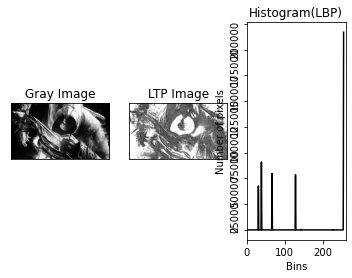

LBP Program is finished


In [33]:
hist_lbp = cv2.calcHist([img_ltp], [0], None, [256], [0, 256])
output_list = []
output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"        
})
output_list.append({
    "img": img_ltp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LTP Image",
    "type": "gray"
})    
output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()


print("LBP Program is finished")

# VGG16


In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np


In [ ]:
model = VGG16(weights='imagenet', include_top=False)



In [24]:
img_path = 'C:/Users/ziyad/Desktop/all desktop/Heriotwat/RP/Code/Research/GFG35.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)


In [32]:
temp = 0;
for featuredata in features[0, :]:
    if(temp<=999):
        print(len(featuredata)) #write ResNet features to file
temp = temp + 1


7
7
7
7
7
7
7


# ResNET


In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np



In [12]:

model = ResNet50(weights='imagenet',include_top=False)


94773248/94765736 [==============================] - 5s 0us/step


In [14]:

img_path = 'C:/Users/ziyad/Desktop/all desktop/Heriotwat/RP/Code/Research/GFG35.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)


In [16]:
preds.shape

(1, 7, 7, 2048)

# LDN

In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Implémentation LDP Kirsh Algorithm 
def kirsch_filter(gray):
    if gray.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG3 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG4 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG5 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.float32)
    kernelG6 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.float32)
    kernelG7 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.float32)
    kernelG8 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.float32)
    kernelG1 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.float32)
    kernelG2 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.float32)

    g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    ma = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    mi = cv2.min(
        g1, cv2.min(
            g2, cv2.min(
                g3, cv2.min(
                    g4, cv2.min(
                        g5, cv2.min(
                            g6, cv2.min(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return ma,mi



In [82]:
fg = cv2.imread("test.jpg")
fg_rgb = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(fg_rgb, cv2.COLOR_RGB2GRAY)    
g8,g1 = kirsch_filter(gray)


In [83]:
total=g8*8+g1

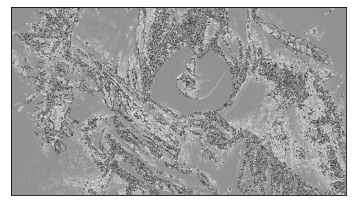

In [85]:

# show results 
plt.imshow(total,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

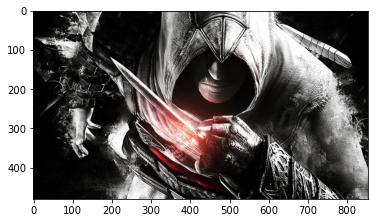

In [24]:
plt.imshow(fg_rgb)

